In [17]:
import importlib
from utils import image, model

# 변경된 모듈 재로드
importlib.reload(image)
importlib.reload(model)

# 재로드된 함수 가져오기
from utils.image import load_image, visualize_segmented_parts
from utils.model import load_model, segment_image
import yaml

# yolo v11 segmentation


0: 640x416 1 person, 367.0ms
Speed: 4.0ms preprocess, 367.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 416)
세그멘테이션 결과: [{'box': [324, 98, 910, 1860], 'label': 'person', 'score': 0.9349388480186462, 'mask': array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)}]


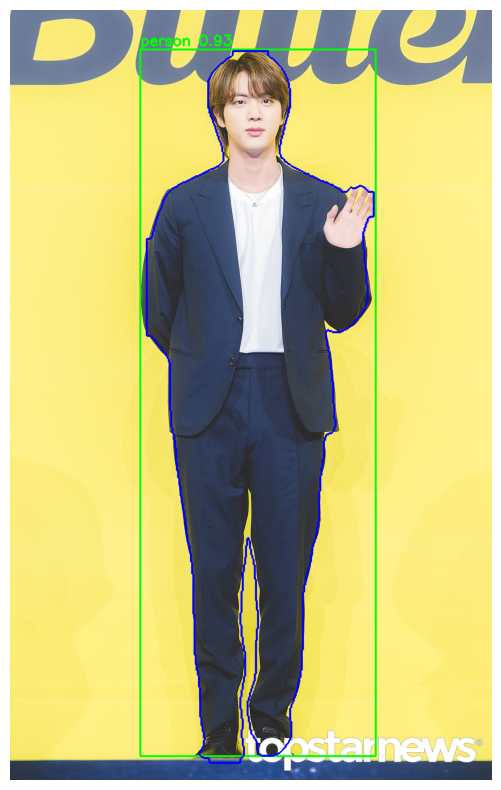

In [18]:
# 설정 파일 로드
with open("config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

# 경로 및 설정 값 가져오기
model_path = config['paths']['model']
image_path = config['paths']['input_dir'] + "bts_jhin.jpg"

# 모델 로드
model = load_model(model_path)
image = load_image(image_path) 
results = segment_image(model, image)
print("세그멘테이션 결과:", results)

# 세그멘테이션 결과 시각화
visualize_segmented_parts(image, results)

# yolo v11 model fine-tuning (Hair Segmentation)

In [32]:
# weight file 생성